# Car failure/breakdown prediction based on various mechanical indicators

## Importing nescesary libraries and data



In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv("/content/car_failure_dataset.csv")
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure


## data inspection/cleaning

In [25]:
data.shape

(10000, 9)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 703.2+ KB


In [27]:
data.drop(['UDI', 'Product ID'], axis = 1, inplace =True)

In [28]:
data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


In [29]:
data.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Failure Type               0
dtype: int64

In [30]:
data['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [31]:
data['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

### data transformation

### converting categorical variables into numeric values

In [35]:
# any type of failure will be transformed into 1 and no failure as 0 

for i in range(len(data)):
  if data['Failure Type'][i] == "No Failure":
    data['Failure Type'][i] = 0
  else:
    data['Failure Type'][i] = 1

<ipython-input-35-dc763a23fa74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Failure Type'][i] = 0
<ipython-input-35-dc763a23fa74>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Failure Type'][i] = 1


In [36]:
data['Failure Type'].value_counts()

0    9652
1     348
Name: Failure Type, dtype: int64

In [38]:
data['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [39]:
#converting vehicle type into ordinal variable

for i in range(len(data)):
  if data['Type'][i] == "M":
    data['Type'][i] = 0
  elif data['Type'][i] == "L":
    data['Type'][i] = 1
  else:
    data['Type'][i] = 2



<ipython-input-39-00b818cf3619>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type'][i] = 0
<ipython-input-39-00b818cf3619>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type'][i] = 1
<ipython-input-39-00b818cf3619>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type'][i] = 2


In [43]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,0,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0


## **EDA**

### distribution analysis using histogram

array([[<AxesSubplot:title={'center':'Air temperature [K]'}>,
        <AxesSubplot:title={'center':'Process temperature [K]'}>],
       [<AxesSubplot:title={'center':'Rotational speed [rpm]'}>,
        <AxesSubplot:title={'center':'Torque [Nm]'}>],
       [<AxesSubplot:title={'center':'Tool wear [min]'}>, <AxesSubplot:>]],
      dtype=object)

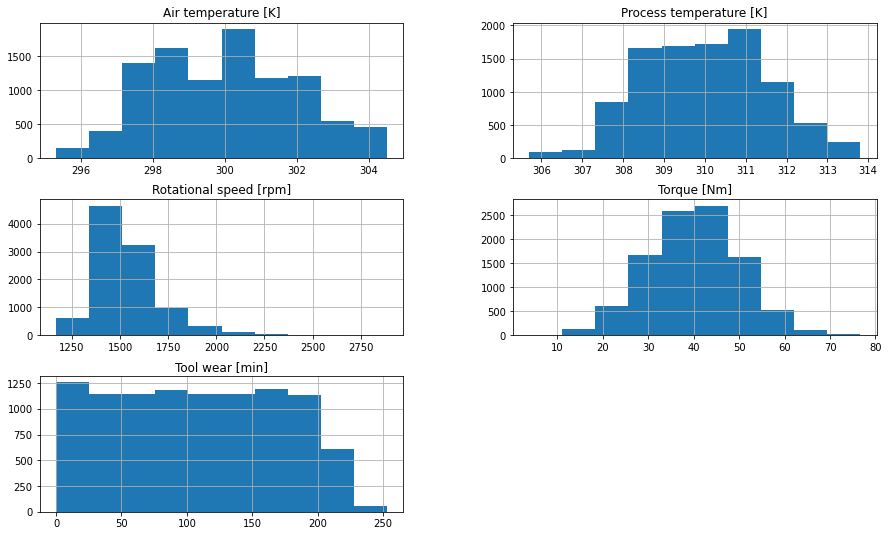

In [44]:
plt.rcParams["figure.figsize"] = (15,9)
data.hist()

<AxesSubplot:>

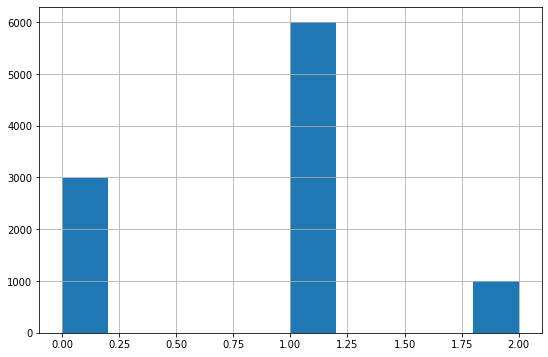

In [47]:
plt.rcParams["figure.figsize"] = (9,6)
data['Type'].hist()

<AxesSubplot:>

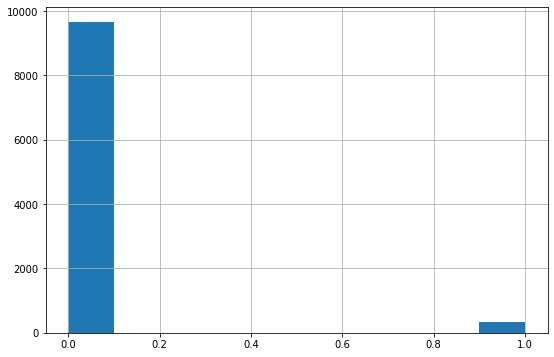

In [48]:
plt.rcParams["figure.figsize"] = (9,6)
data['Failure Type'].hist()

### Correlation Plot

In [45]:
data.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000


### pre-proscessing

In [80]:
x = data.drop(['Failure Type'], axis=1).to_numpy()

y = data['Failure Type'].to_numpy()
y = y.astype('int')

In [81]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# x_tree_based = scaler.fit_transform(x_tree_based)

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## **model building**

### logistic regression

In [84]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred =  clf.predict(x_test)

### metrics

In [85]:
from sklearn.metrics import accuracy_score
print("training results accuracy for logisic regression: " + str(accuracy_score(y_test, y_pred)))


training results accuracy for logisic regression: 0.97


In [86]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1452
           1       0.59      0.21      0.31        48

    accuracy                           0.97      1500
   macro avg       0.78      0.60      0.65      1500
weighted avg       0.96      0.97      0.96      1500



### k-nearest neighbours

In [87]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(x_train, y_train)

y_pred =  neigh.predict(x_test)

In [88]:
print("training results accuracy for KNeighborsClassifier: " + str(accuracy_score(y_test, y_pred)))


training results accuracy for KNeighborsClassifier: 0.976


In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1452
           1       0.77      0.35      0.49        48

    accuracy                           0.98      1500
   macro avg       0.88      0.68      0.74      1500
weighted avg       0.97      0.98      0.97      1500



'''here we can see that precision, recall, f1 score is better for actual failure prediction compared to logistic'''

In [90]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf.fit(x_train, y_train)
y_pred =  clf.predict(x_test)

In [91]:
print("training results accuracy for decision tree: " + str(accuracy_score(y_test, y_pred)))

training results accuracy for decision tree: 0.978


In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1452
           1       0.63      0.75      0.69        48

    accuracy                           0.98      1500
   macro avg       0.81      0.87      0.84      1500
weighted avg       0.98      0.98      0.98      1500



'''no improvement here so lets try ensemble methods'''

###Random forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5,n_estimators=300, random_state=0)


clf.fit(x_train, y_train)
y_pred =  clf.predict(x_test)

In [99]:
print("training results accuracy for random forest: " + str(accuracy_score(y_test, y_pred)))

training results accuracy for random forest: 0.974


In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1452
           1       0.85      0.23      0.36        48

    accuracy                           0.97      1500
   macro avg       0.91      0.61      0.67      1500
weighted avg       0.97      0.97      0.97      1500



'''random forest is giving very low f-1 score forr failure classification so we will try some other model'''

### XGBoost

In [103]:
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=5,n_estimators=300,learning_rate=0.05)


clf.fit(x_train, y_train)
y_pred =  clf.predict(x_test)

In [104]:
print("training results accuracy for XGboost: " + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

training results accuracy for random forest: 0.986
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1452
           1       0.89      0.65      0.75        48

    accuracy                           0.99      1500
   macro avg       0.94      0.82      0.87      1500
weighted avg       0.99      0.99      0.98      1500



'''here we can see that xgboost performs the best in terms of important metrics 
for failure classification specifically and hence we can choose this as our final model'''